 ###  Machine Learning  analysis Becarios Senplades

In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
df = pd.read_excel('../../../Consultoria/senplades_becarios/data/students.csv')

In [3]:
## All this columns are not helpful at all
df.drop(['numero_DU', 'id_inec_ci', 'id_inec_ruc', 'scholar_progr', 'scholar_compo', 'subject_study_1_DU', 
           'subject_study_2_DU', 'subject_study_3_DU', 'subject_study_4_DU', 'estado_DU', 'place_birth_DU',
           'sector', 'working_relation', 'denominacion_carrera_DU', 'area_DU', 'subarea_DU', 
           'nivel_formacion_DU', 'type_title_DU', 'tipo_fecha_DU','clase_contribuyente_DU', 
           'estado_personal_natural_DU', 'estado_sociedad_DU', 'pais_DU',
           'tipo_contribuyente_DU', 'ubicacion_geogra_DU', 'participacion_DU', 'forma_DU', 'empleados_DU',
           'ventas_totales_DU', 'tamano_empresa_DU', 'codigo_DU', 'codigo_actividad_DU', 'age_range_DU',
          ], axis=1, inplace=True) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 41 columns):
year                 2726 non-null int64
yearly_salary        2726 non-null float64
days_worked          2726 non-null int64
number_employer      2726 non-null int64
low_salary_range     2726 non-null object
high_salary_range    2717 non-null object
aveg_salary          2726 non-null float64
median_salary        2726 non-null float64
min_salary           2726 non-null float64
max_salary           2726 non-null float64
stud_age             2726 non-null float64
ethnicity            2726 non-null object
prov_birth           2726 non-null object
senp_birth           2726 non-null object
prov_resid           2726 non-null object
city_resid           2726 non-null object
senp_resid           2726 non-null object
country_study        2726 non-null object
school_name          2726 non-null object
type_study_DU        2726 non-null object
agg_study            2726 non-null object
subject_

In [5]:
# returning floats of salary
df['low_salary_range'] = df['low_salary_range'].str.replace(',','.')
df.low_salary_range = df.low_salary_range.convert_objects(convert_numeric=True)
df['high_salary_range'] = df['high_salary_range'].str.replace(',','.')
df.high_salary_range = df.high_salary_range.convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [6]:
## replacing missing values of high salaries with the mean
df.high_salary_range = df.high_salary_range.fillna(np.mean(df.high_salary_range))

In [7]:
df.describe().T

count          mean           std      min          25%  \
year               2726.0   2014.880778      0.447727  2013.00  2015.000000   
yearly_salary      2726.0  15550.126948  10616.697810   354.00  7888.000000   
days_worked        2726.0    242.650404     85.573849     5.00   189.000000   
number_employer    2726.0      1.325018      0.584834     1.00     1.000000   
low_salary_range   2726.0   1566.638298    898.130706   354.00  1062.000000   
high_salary_range  2726.0   1926.599496    926.258096   707.99  1415.990000   
aveg_salary        2726.0   1753.280397    936.647890   354.00  1077.216522   
median_salary      2726.0   1777.188134    982.137259   177.00  1039.675018   
min_salary         2726.0   1376.015495   1018.530831    11.00   404.000000   
max_salary         2726.0   2094.774711   1188.066696   354.00  1400.000000   
stud_age           2726.0     31.716954      5.813403    22.00    28.083334   
year_end_study     2726.0   2013.696625      1.249750  2008.00  2013.000000   
year_return        2726.0   2013.812546      1.231574  2008.00  2013.000000   
degree_year        2678.0   2011.377147      3.019986  1983.00  2010.000000   
degree_month       2678.0      6.480956      3.473822     1.00     3.000000   
degree_day         2678.0     15.242345      8.638719     1.00     8.000000   

                            50%          75%           max  
year                2015.000000   2015.00000   2015.000000  
yearly_salary      14120.000000  20340.00000  68819.400000  
days_worked          300.000000    300.00000    360.000000  
number_employer        1.000000      2.00000      5.000000  
low_salary_range    1416.000000   2124.00000   5310.000000  
high_salary_range   1769.990000   2477.99000   5309.990000  
aveg_salary         1676.000000   2391.56665   6877.620117  
median_salary       1676.000000   2588.00000   6670.399902  
min_salary          1212.000000   2000.00000   6400.000000  
max_salary          2000.000000   2641.00000  15544.000000  
stud_age              30.083334     33.50000     69.416664  
year_end_study      2014.000000   2015.00000   2015.000000  
year_return         2014.000000   2015.00000   2015.000000  
degree_year         2012.000000   2013.00000   2015.000000  
degree_month           7.000000      9.00000     12.000000  
degree_day            15.000000     23.00000     31.000000

## Exploratory analysis

In [8]:
df.groupby(['subject_study'], sort=True)[['low_salary_range']].mean().sort_values(by=['low_salary_range'], ascending=False).reset_index()

subject_study  low_salary_range
0                          ECONOMIA E INDUSTRIA LECHERA            5310.0
1     EPIDEMEOLOGIA Y SALUD (RESN/AMPHIL/PHDN/A EPID...            5310.0
2                                 DESARROLLO SOSTENIBLE            5310.0
3           MASTER EN INGENIERIA Y GESTION DE PROYECTOS            5310.0
4                 INGENIERIA AMBIENTAL Y DESANILIZACION            4779.0
5     SISTEMAS DE SOPORTE DE DECISION CON RESTRICCIO...            4248.0
6                               ESTUDIOS BIOAMBIENTALES            4248.0
7                         ASTROFISICA DE ALTAS ENERGIAS            4248.0
8        METALURGIA EXTRACTIVA Y CIENCIAS DE MATERIALES            4248.0
9                       DOCTOR EN CIENCIAS DE LA TIERRA            4248.0
10    CIENCIAS CON ESPECIALIDAD EN SISTEMAS DE CALID...            4248.0
11    INVESTIGACION Y AVANCES EN MEDICINA PREVENTIVA...            4248.0
12                              INGENIERIA DE PLASTICOS            4248.0
13                    INTEGRADO DE PETROLEO GEOCIENCIAS            4248.0
14                                MOLECULAR BIOSCIENCES            4248.0
15                                       NANOTECNOLOGIA            4248.0
16    ANALISIS DE BIOSENALES RELACIONADAS A ESTIMULA...            4248.0
17         BIOREFINERIA BIOCOMBUSTIBLES Y BIOMATERIALES            4248.0
18                          DOCTOR EN CIENCIAS TECNICAS            4248.0
19                INGENIERIA EN PETROLEOS Y GAS NATURAL            4248.0
20                               INGENIERIA EN SOFTWARE            4248.0
21                  MAESTRIA EN SOCIOECONOMIA AMBIENTAL            4248.0
22               ADMINISTRACION CON MENCION EN ECONOMIA            4248.0
23                 INGENIERIA DE SISTEMAS E INFORMATICA            4248.0
24               INDUSTRIA DE INGENIERIA DE FABRICACION            4248.0
25                   DOCTORADO EN CIENCIAS DE LA TIERRA            4248.0
26    MASTER OFICIAL EN DESARROLLO ECONOMICO Y POLIT...            4248.0
27    INGENIERIA EN PETROLEOS Y GAS NATURAL  ESPECIA...            3776.0
28      POSTDOCTORADO EN BIOQUIMICA Y BILOGIA MOLECULAR            3540.0
29    TECNOLOGIA EDUCATIVA: E-LEARNING Y GESTION DEL...            3540.0
...                                                 ...               ...
1483              DOCTORADO EN CIENCIAS DE LA AGRONOMIA             354.0
1484                      DOCTORADO EN CAMBIO CLIMATICO             354.0
1485               GLOBALIZACION Y DESARROLLO AMERICANO             354.0
1486                              MAESTRIA EN MARKETING             354.0
1487            MAESTRIA EN MANEJO DE RECURSO NATURALES             354.0
1488                        HIDRAULICA Y MEDIO AMBIENTE             354.0
1489                      HIDROLOGIA, GESTION Y RIESGOS             354.0
1490    PERFORMANCE DESIGN AND PRACTICE (CINE Y DISENO)             354.0
1491                                         PERIODISMO             354.0
1492  DISENO ESTRATEGICO (VALOR AGREGADO Y GESTION D...             354.0
1493                                     DISENO DIGITAL             354.0
1494                     DISENO ARQUITECTONICO AVANZADO             354.0
1495                              DIPLOMACIA Y COMERCIO             354.0
1496                                  MASTER EN GESTION             354.0
1497  DIPLOMA SUPERIOR EN ASEGURAMIENTO DE LA CALIDA...             354.0
1498                   MAESTRIA EN LENGUAJES COMBINADOS             354.0
1499                        ILUSTRACION Y ENSAYO VISUAL             354.0
1500                               PLANIFICACION URBANA             354.0
1501        DESARROLLO REGIONAL E INTEGRACION ECONOMICA             354.0
1502                                     PLANTA Y SUELO             354.0
1503                   DESARROLLO MEDIOAMBIENTAL URBANO             354.0
1504                         DESARROLLO LATINOAMERICANO             354.0
1505                      DESARROLLO E INNOVAC

In [9]:
def histogram_plotter(title, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style('white')
#     dist = sns.distplot(data, kde=False, bins=30)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    
    dist.axvline(np.mean(data), lw=5, c='darkred', ls='dashed')
    average_roll = '{0:.2f}'.format(np.mean(data))
    title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
    dist.set_title(title, fontsize=16)
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})

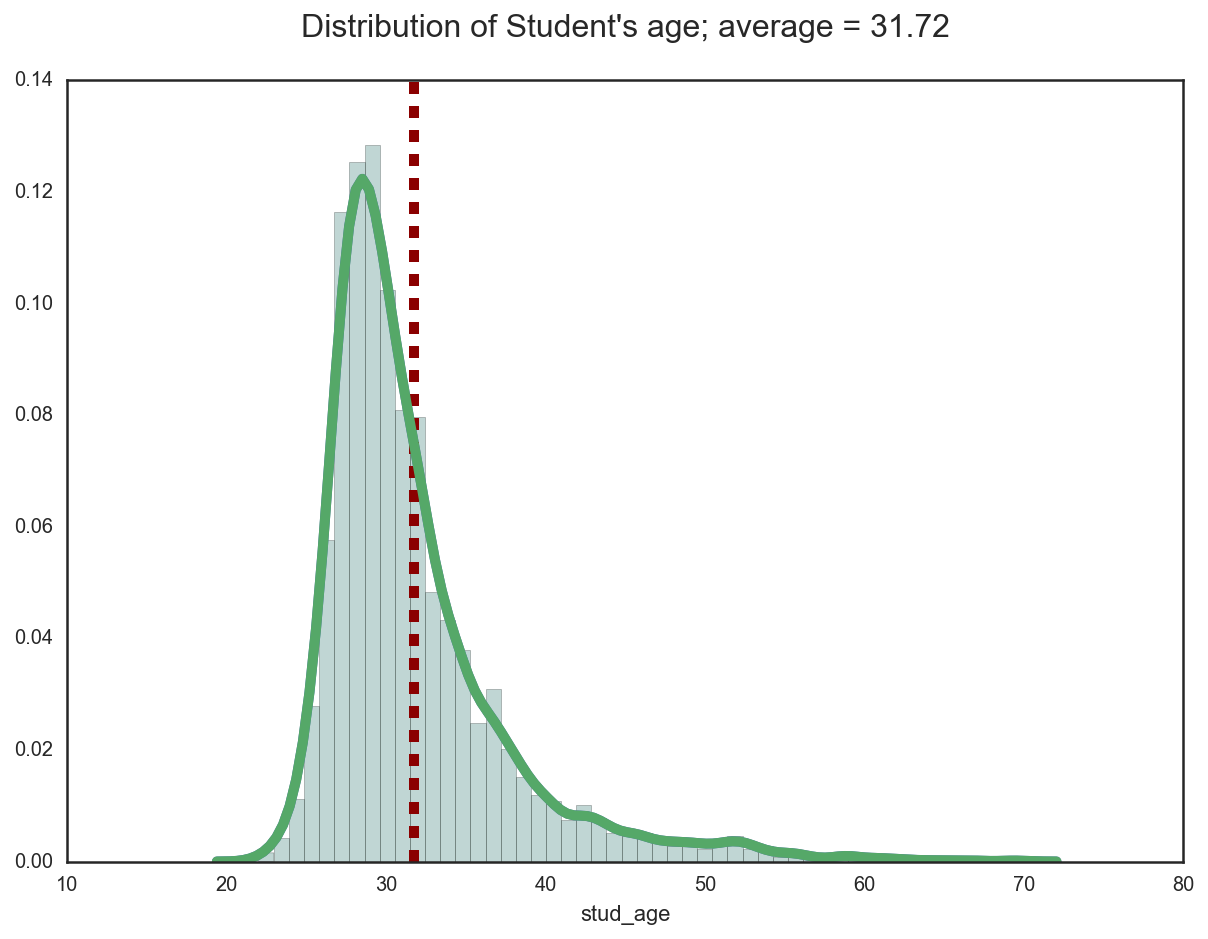

In [10]:
histogram_plotter("Student's age", df.stud_age)

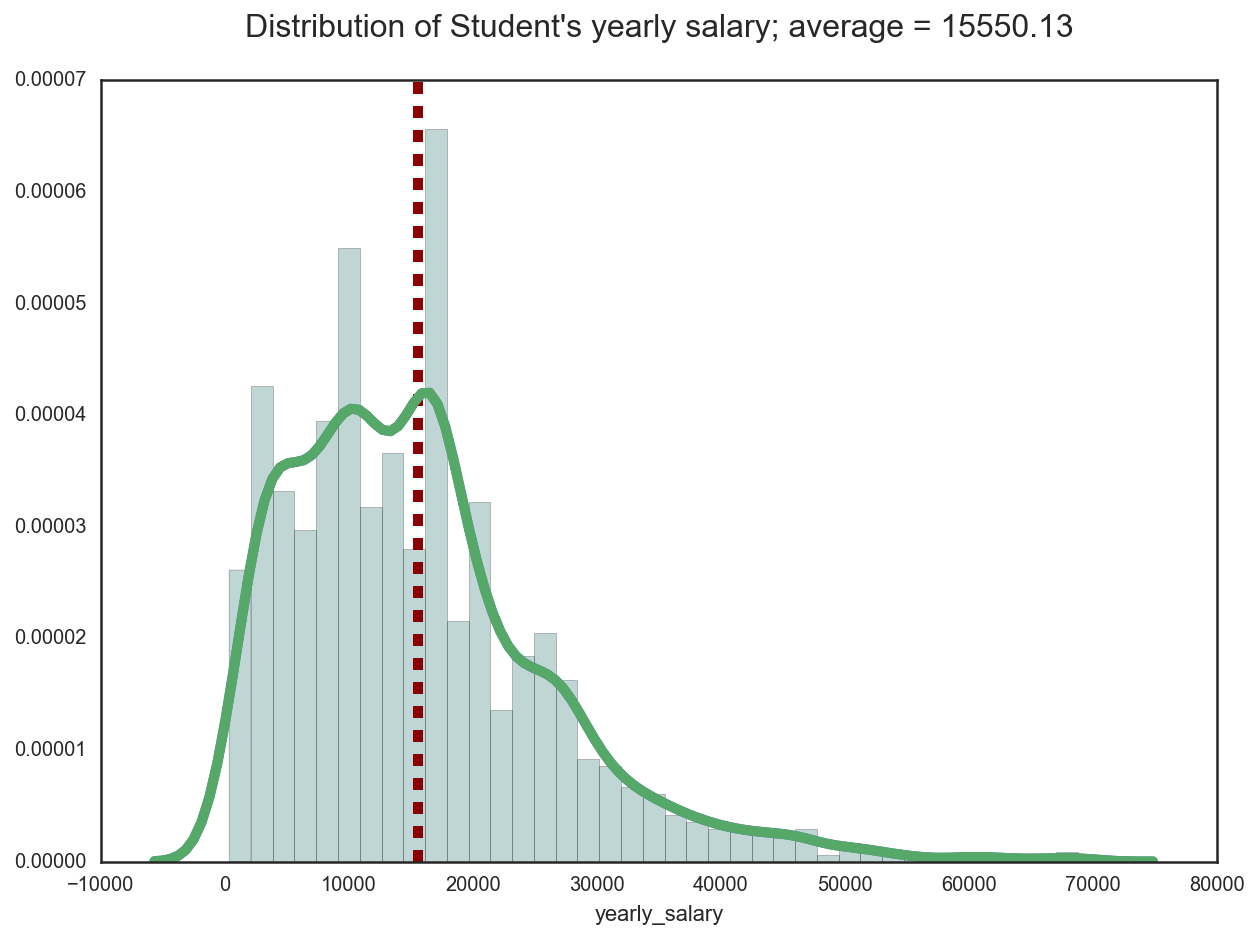

In [11]:
histogram_plotter("Student's yearly salary", df.yearly_salary )

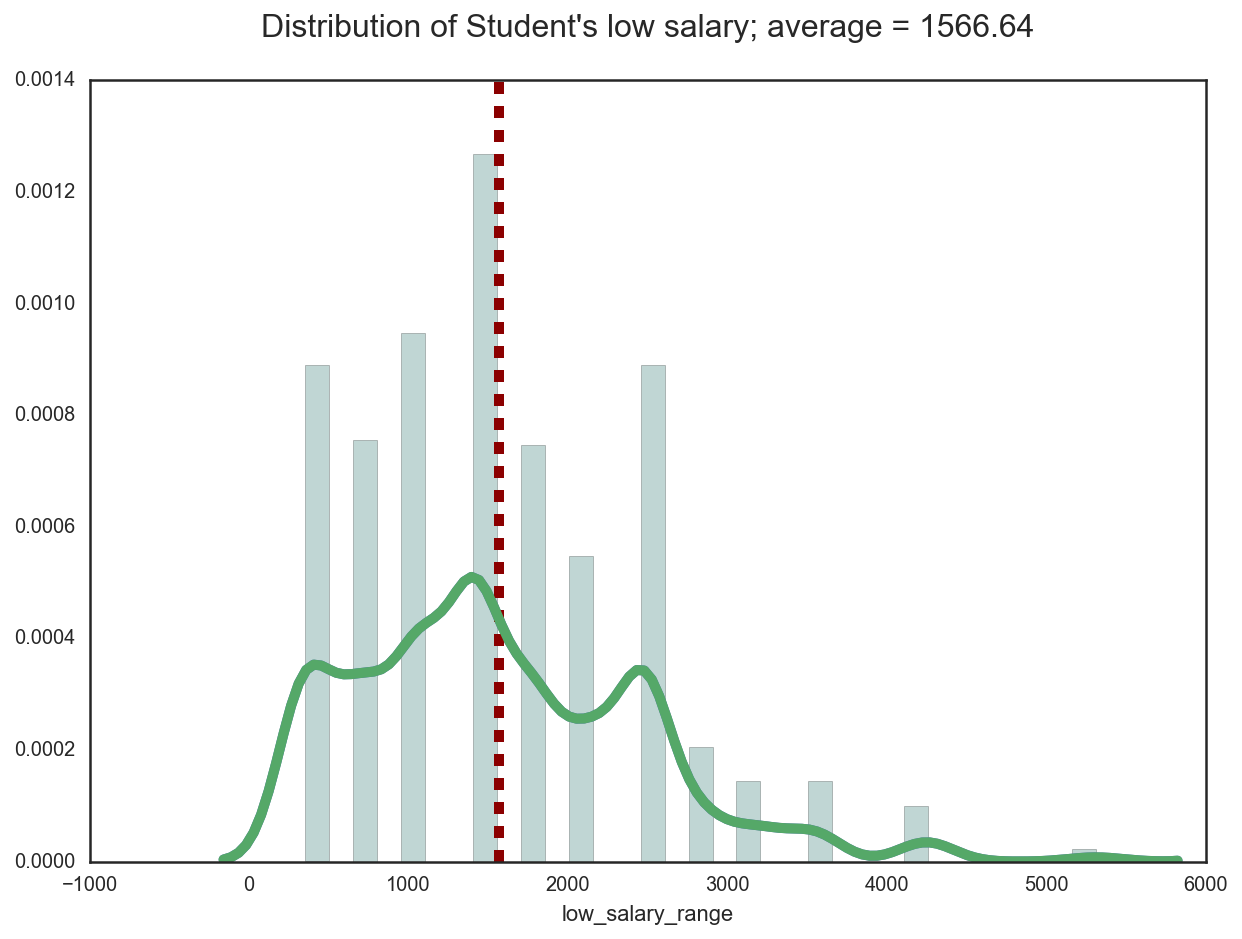

In [12]:
histogram_plotter("Student's low salary", df.low_salary_range)

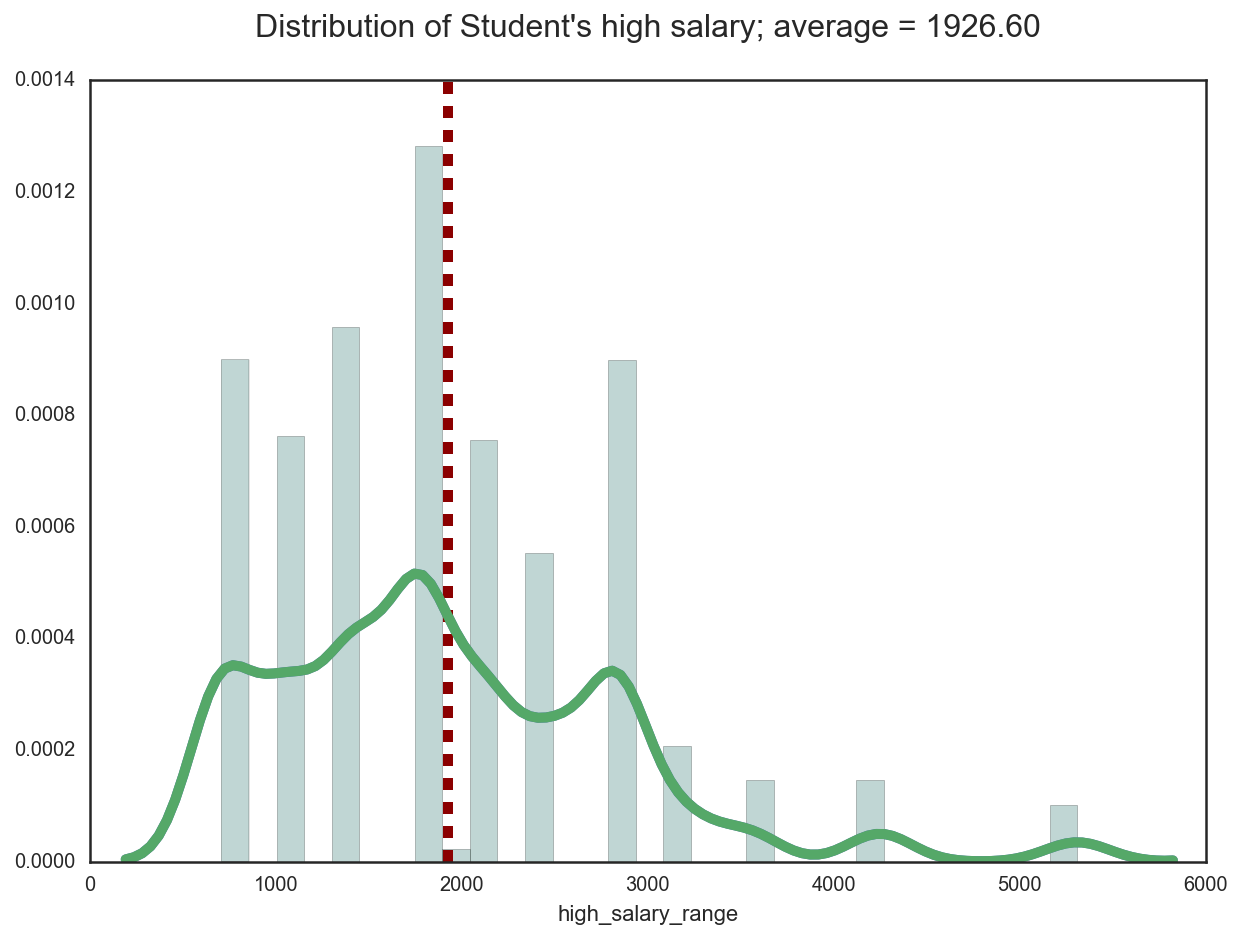

In [13]:
histogram_plotter("Student's high salary", df.high_salary_range)

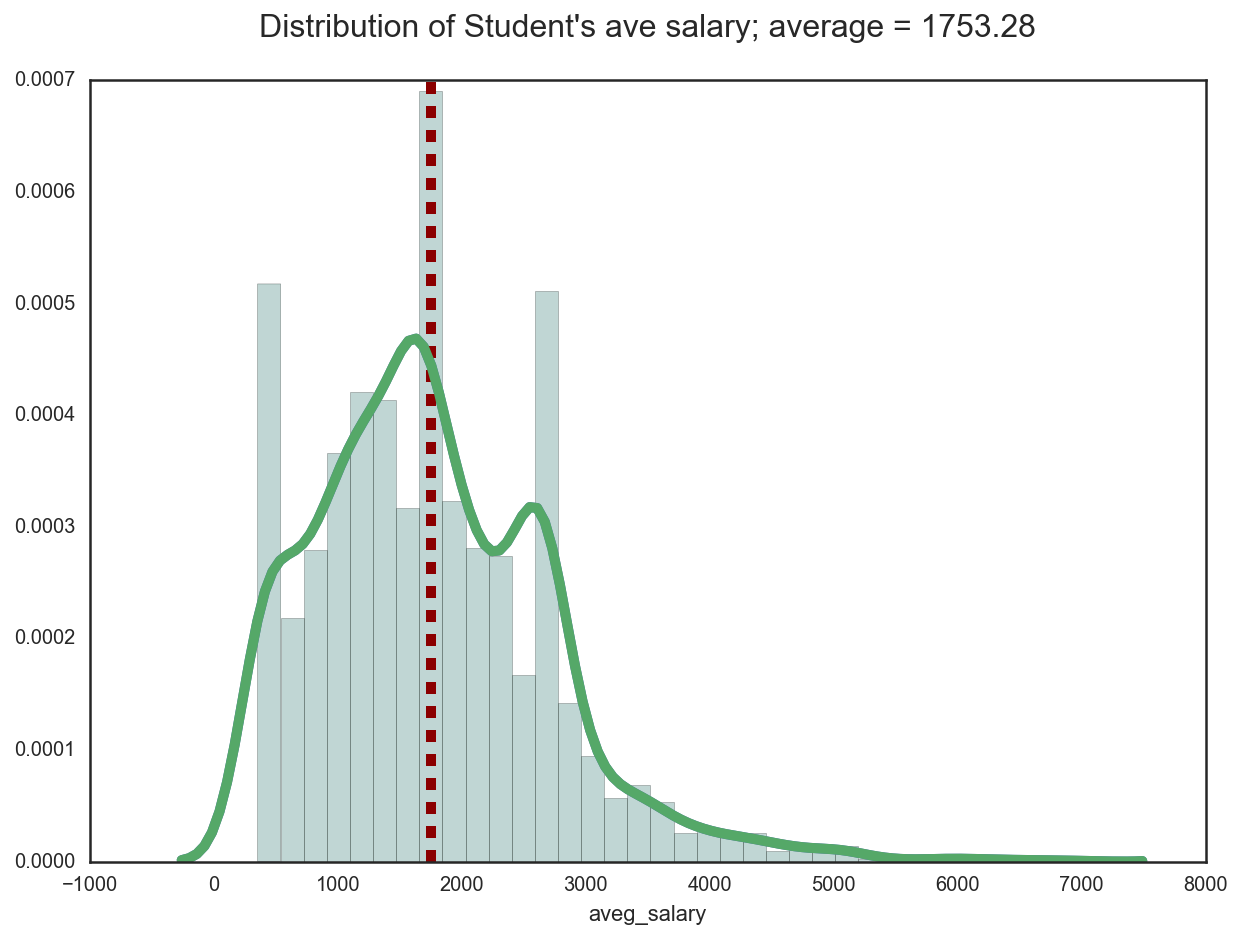

In [14]:
histogram_plotter("Student's ave salary", df.aveg_salary)

//anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


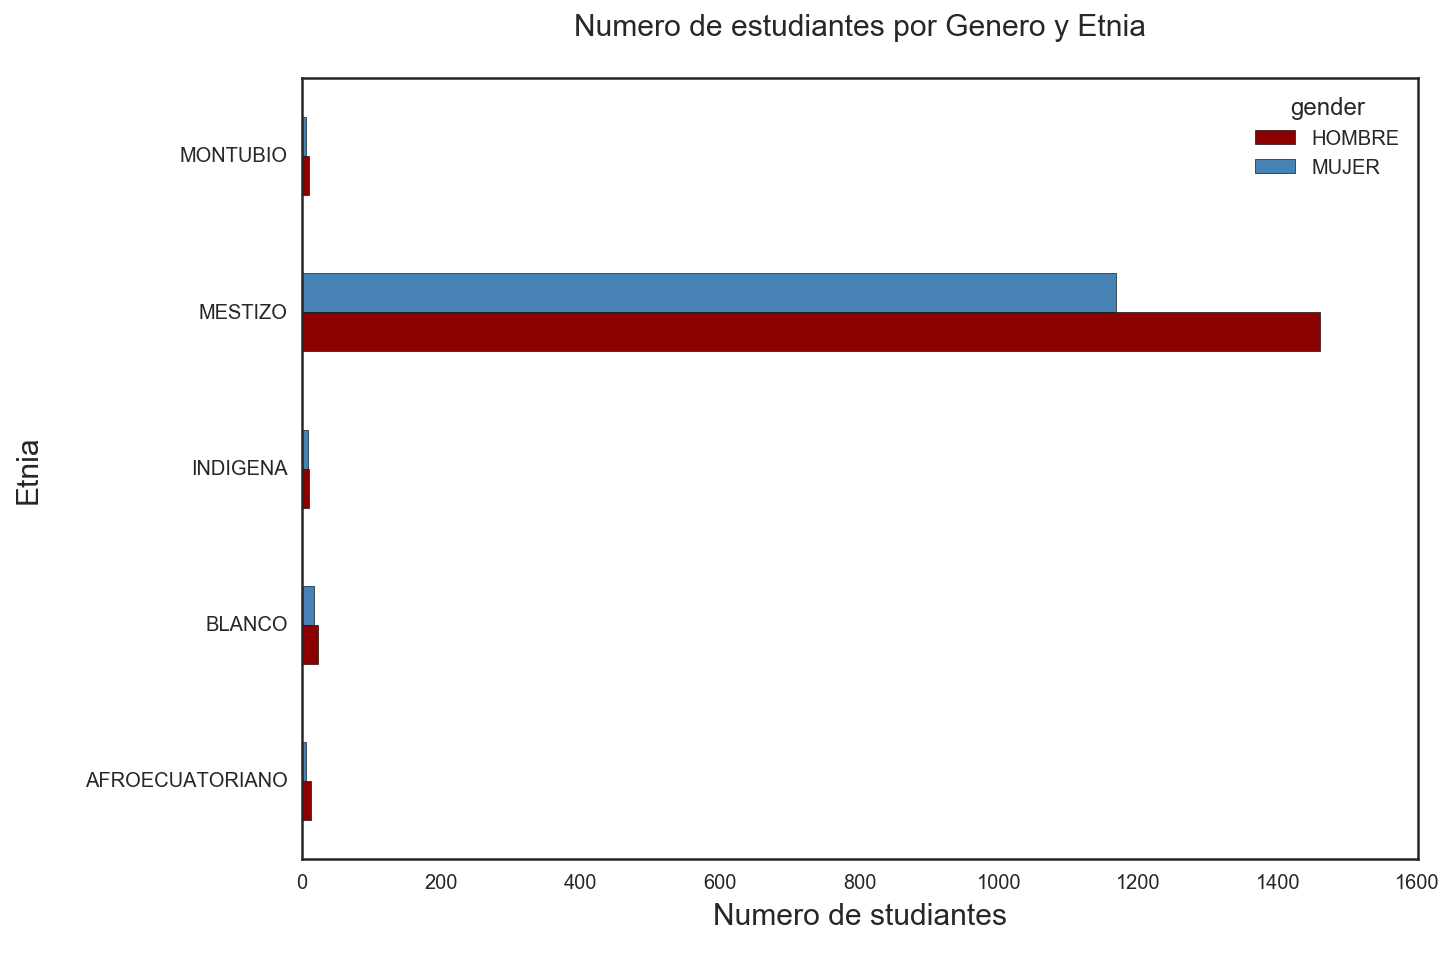

In [15]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
df.groupby(['ethnicity','gender']).size().unstack().plot( kind="barh", colors=['darkred', 'steelblue'], ax=ax)
plt.title('Numero de estudiantes por Genero y Etnia\n', fontsize = 15)
plt.ylabel('Etnia\n', fontsize=15)
plt.xlabel('Numero de studiantes\n', fontsize=15)
plt.show()

In [16]:
func_tuples = [('Promedio', np.mean), ('Variance', np.var), ('Std', np.std)]
df.groupby(['gender'])[['stud_age']].agg(func_tuples).reset_index()

gender   stud_age                     
            Promedio   Variance       Std
0  HOMBRE  32.512360  37.664265  6.137122
1   MUJER  30.718914  27.177237  5.213179

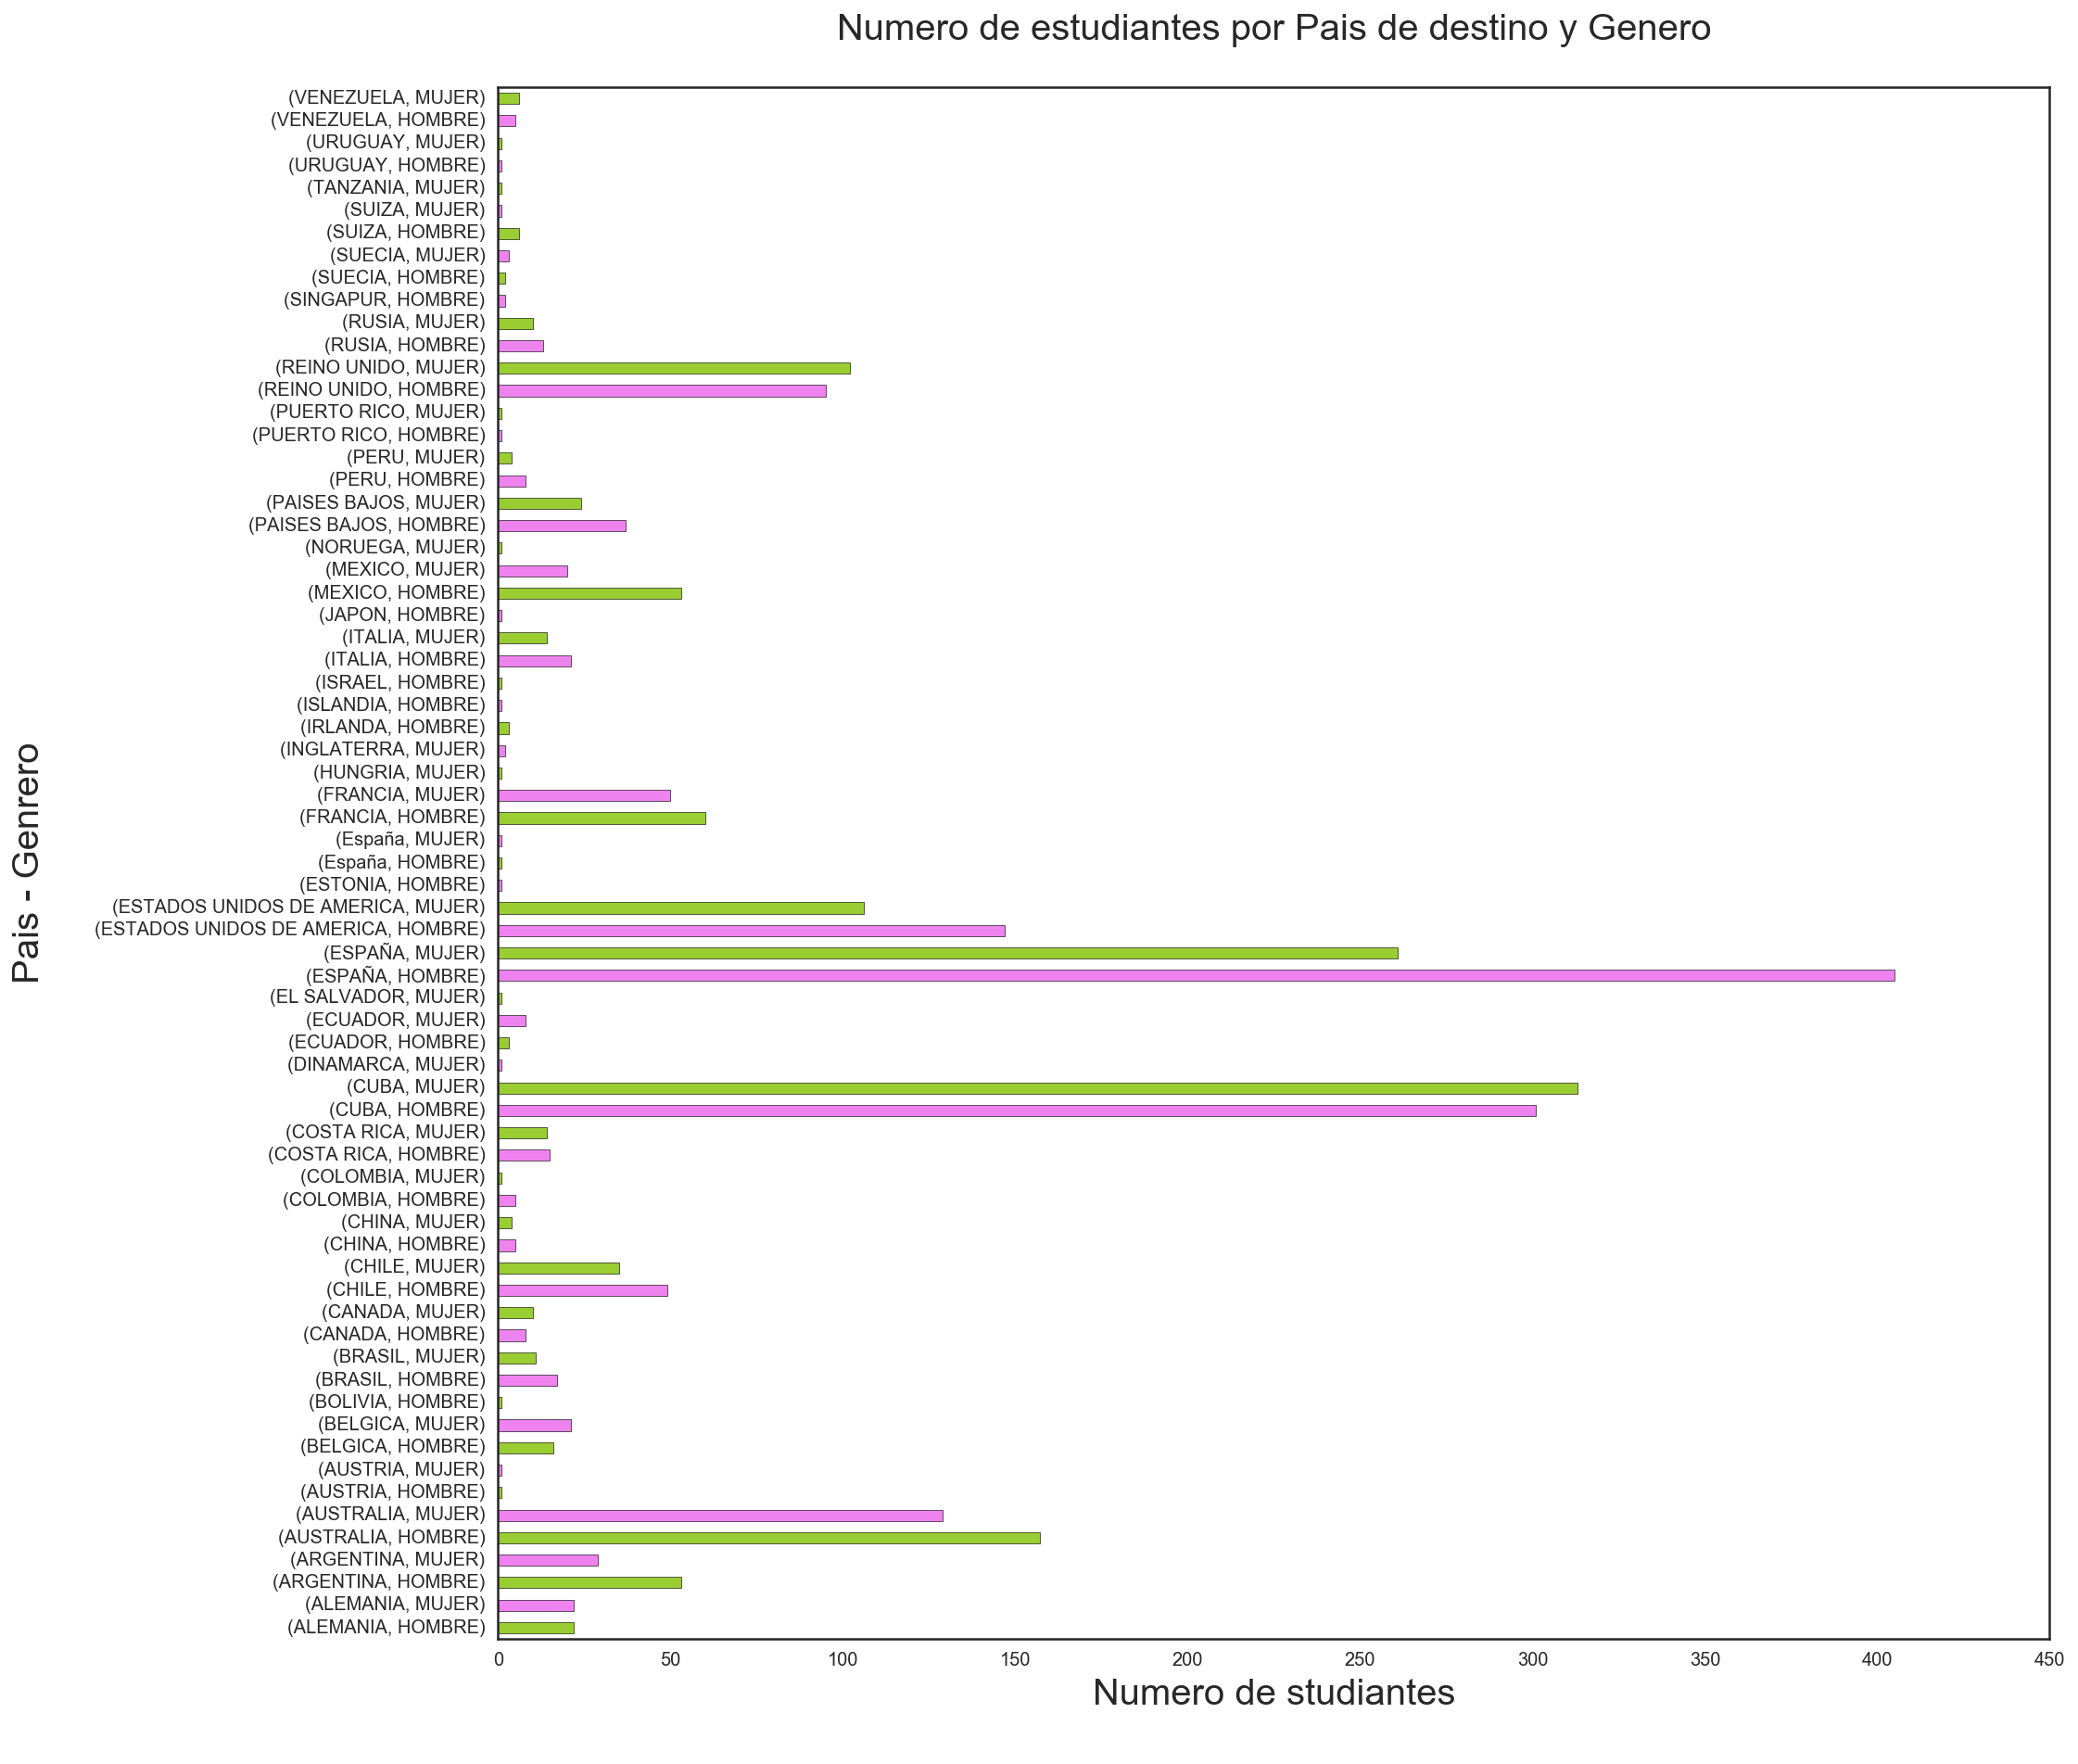

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.groupby(['country_study', 'gender']).size().plot(kind="barh", colors=['yellowgreen', 'violet'], ax=ax)
plt.title('Numero de estudiantes por Pais de destino y Genero\n', fontsize = 20)
plt.ylabel('Pais - Genrero\n', fontsize=20)
plt.xlabel('Numero de studiantes\n', fontsize=20)
plt.show()

http://matplotlib.org/examples/color/named_colors.html

Here is the library if you want to install Altair (is not requiered for the class)
https://altair-viz.github.io/

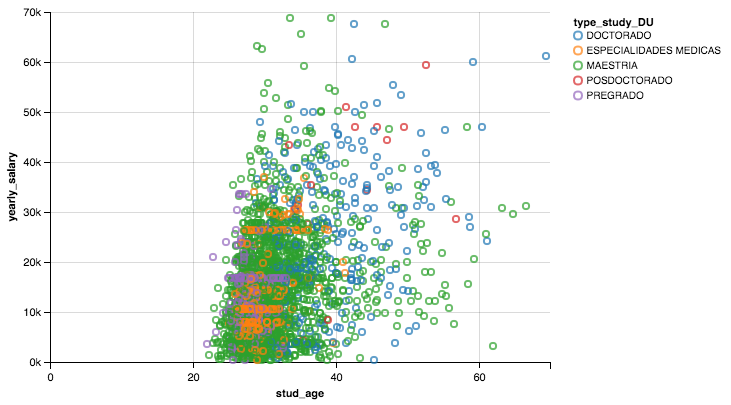

In [18]:
from altair import *
from altair import Chart
Chart(df).mark_point().encode(
    x='stud_age:Q',
    y='yearly_salary:Q',
    color='type_study_DU:N',
)


In [ ]:
Chart(df).mark_bar().encode(y='prov_birth', x='average(yearly_salary)', color='gender:N')

In [20]:
df['years_high_edu'] = df['type_study_DU']

In [21]:
df.years_high_edu.value_counts()

MAESTRIA                  1807
ESPECIALIDADES MEDICAS     351
DOCTORADO                  288
PREGRADO                   265
POSDOCTORADO                15
Name: years_high_edu, dtype: int64

In [22]:
## Years of schooling after highschool
df['years_high_edu'] = df['years_high_edu'].map({'PREGRADO': int(4),
                                                 'MAESTRIA': int(6),
                                                 'DOCTORADO': int(11),
                                                 'POSDOCTORADO': int(13),
                                                 'ESPECIALIDADES MEDICAS': int(8)})

In [23]:
## Log of yearly salary
df['log_year_salary'] = df.yearly_salary.apply(np.log)

## Experience => experience = (age- years of education-6)
df['experience'] = (df['stud_age']-df['years_high_edu']-6)

http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

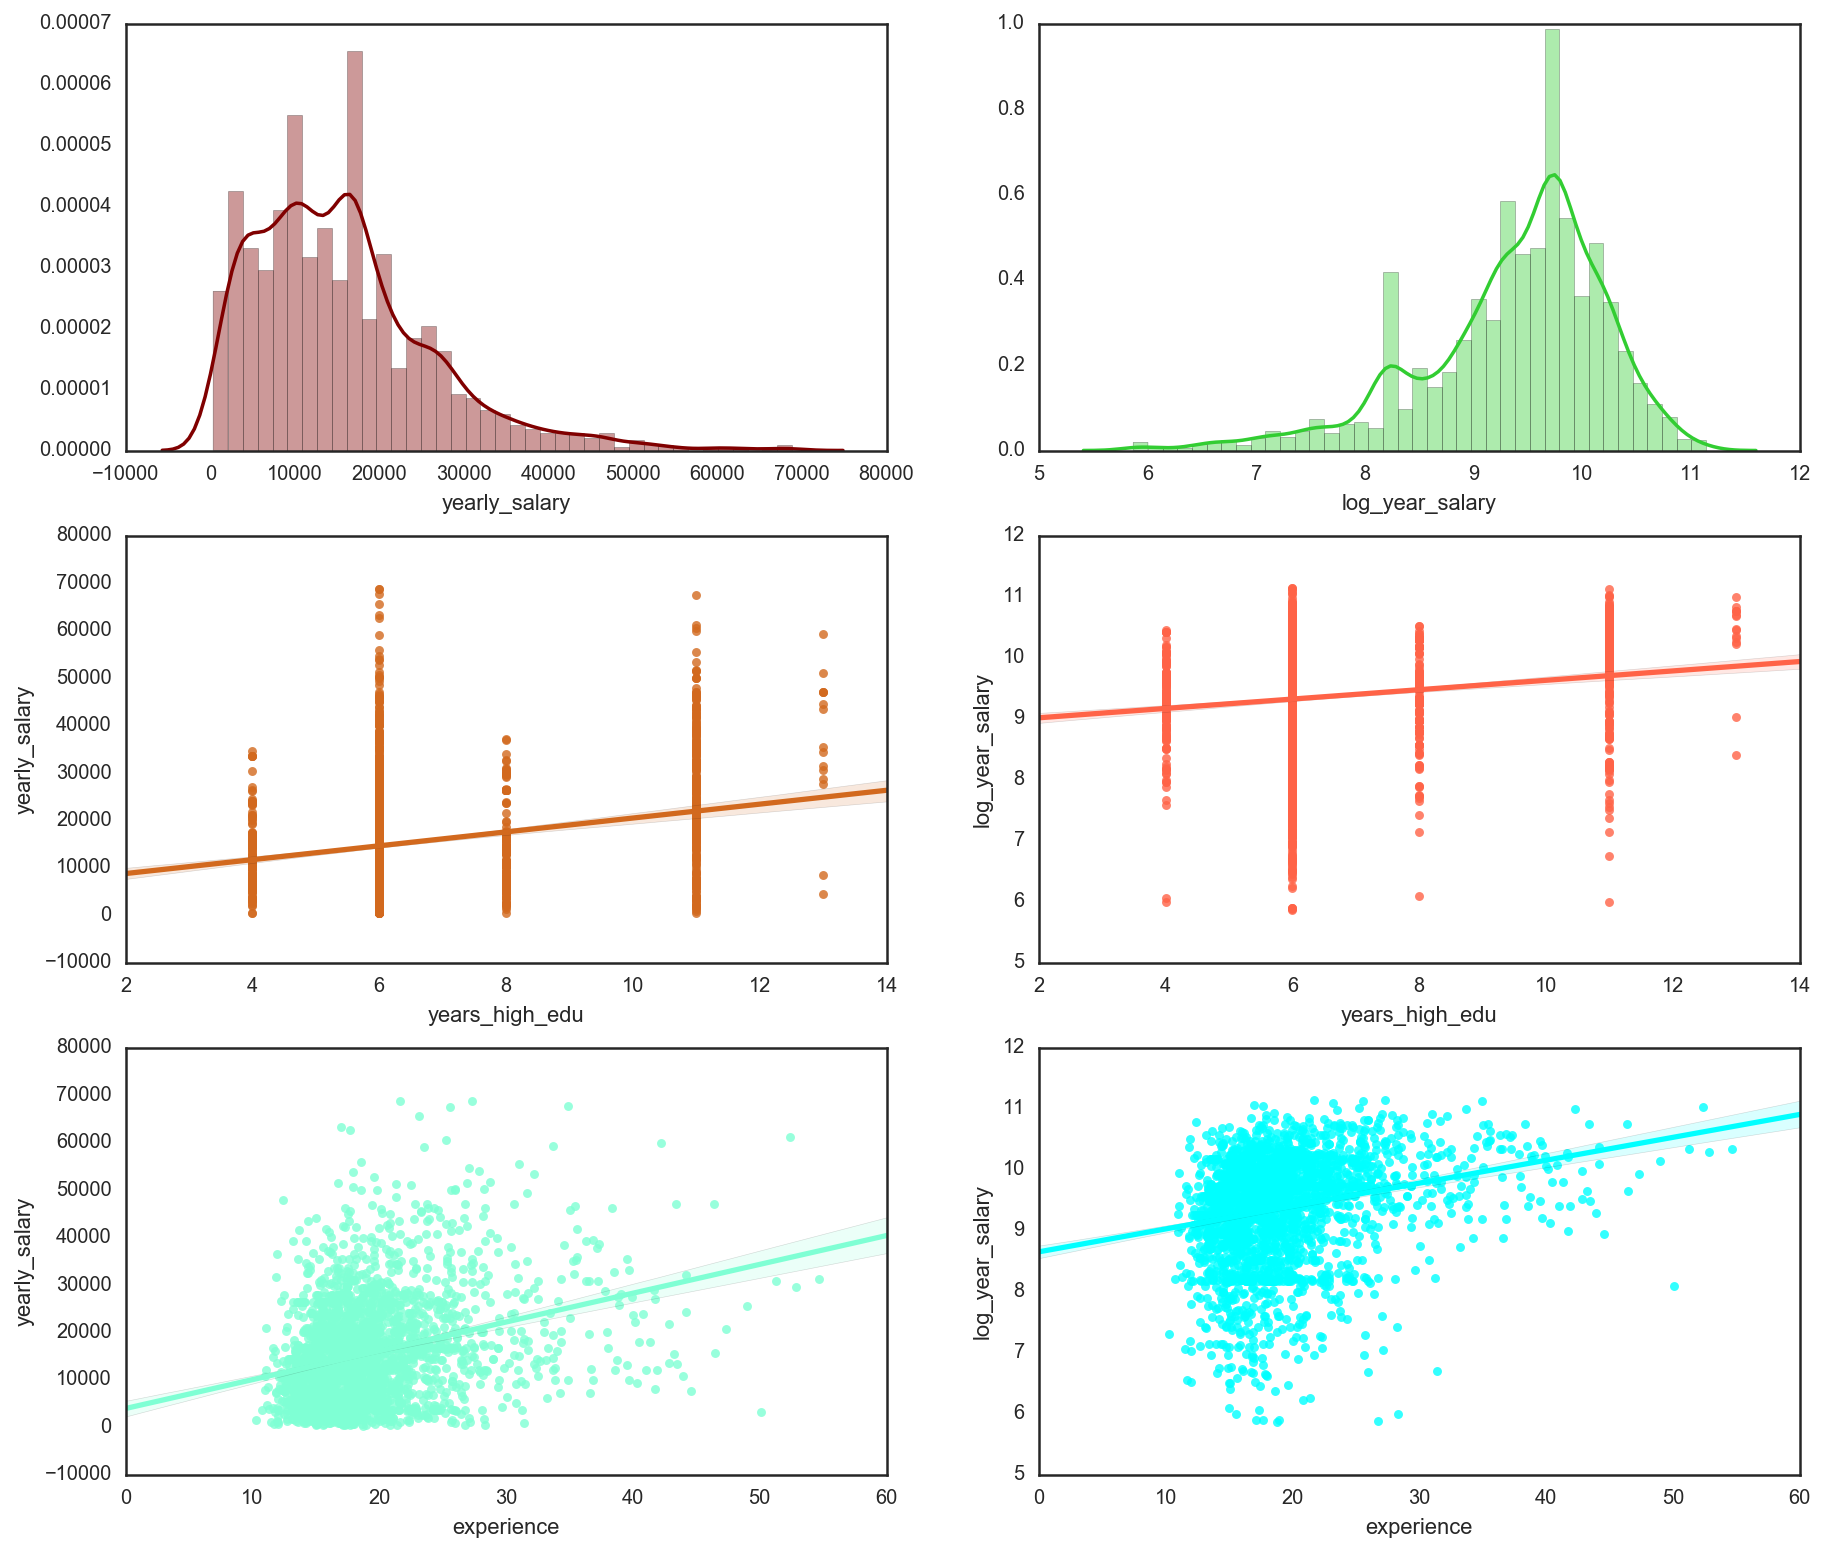

In [24]:
fig, axarr = plt.subplots(3, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(df.yearly_salary ,ax=axarr[0,0], color='maroon')

axarr[0,1] = sns.distplot(df.log_year_salary ,ax=axarr[0,1], color='limegreen')       
                          
axarr[1,0] = sns.regplot(df.years_high_edu,
                       df.yearly_salary, ax=axarr[1,0], color='chocolate')

axarr[1,1] = sns.regplot(df.years_high_edu,
                       df.log_year_salary, ax=axarr[1,1], color='tomato')

axarr[2,0] = sns.regplot(df.experience,
                       df.yearly_salary, ax=axarr[2,0], color='aquamarine')

axarr[2,1] = sns.regplot(df.experience,
                       df.log_year_salary, ax=axarr[2,1], color='cyan')

plt.show()

######################################################################################################################
## Analysis with just one control variable
X and y

In [25]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split

## Defining y and X
y, X = patsy.dmatrices("log_year_salary ~ years_high_edu -1", data=df, return_type="dataframe")
y = np.ravel(y)
print (y.shape) 
print (X.shape)

(2726,)
(2726, 1)


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

(1908, 1) (818, 1) (1908,) (818,)


## Using Sklearn

In [27]:
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain, ytrain)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
## Print the coefficients, and R2, interpret your result 
## See/read this link for interpretation of results/coeficients: 
## http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm
print ("R^2:", model.score(Xtrain, ytrain))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('R^2:', 0.027379869294186458)
('Coefficients:', array([ 0.07538611]))
('Intercept:', 8.8581923468989636)


In [29]:
## Sum of residuals
lm.residues_

//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


1284.1190128152489

In [30]:
predictions = lm.predict(Xtest)
predictions.shape

(818,)

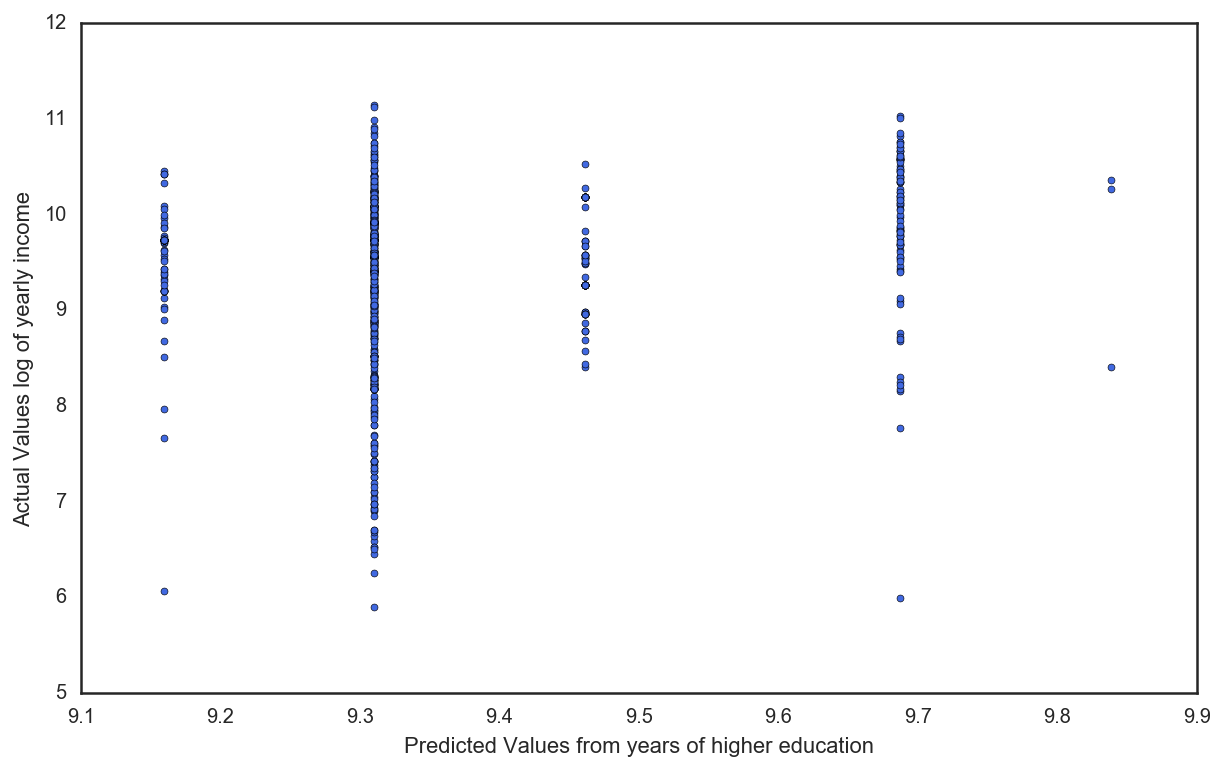

MSE: 0.757


In [31]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, ytest, s=12, c='royalblue', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE: %.3f" % (mean_squared_error(ytest, predictions)))

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

### Using stats model
http://statsmodels.sourceforge.net/devel/example_formulas.html

In [32]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='log_year_salary ~ years_high_edu', data=df).fit()
print lm_stats.summary()

                            OLS Regression Results                            
Dep. Variable:        log_year_salary   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     78.91
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           1.15e-18
Time:                        16:12:49   Log-Likelihood:                -3377.8
No. Observations:                2726   AIC:                             6760.
Df Residuals:                    2724   BIC:                             6771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          8.8612      0.060    148.

In [33]:
## Access and print the parameters
lm_stats.params

Intercept         8.861186
years_high_edu    0.076911
dtype: float64

## Regresion diagnostic

http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html

http://williamqliu.github.io/2015/04/20/stats-primer.html

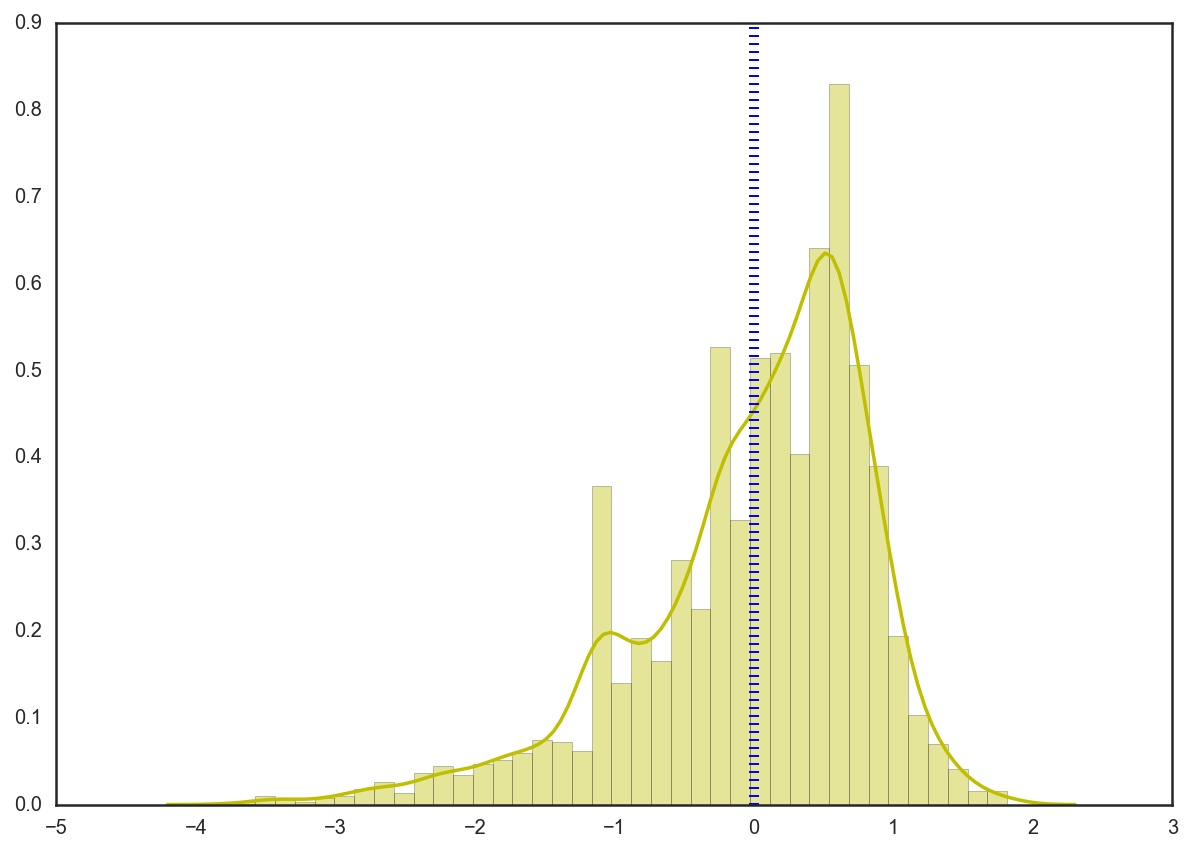

In [34]:
## make a graph of your residuals and include a line for the mean
np.mean(lm_stats.resid)
sns.distplot(lm_stats.resid, color='y')
plt.axvline(np.mean(lm_stats.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [35]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

## Normality of the residuals
### Jarque-Bera test

http://webspace.ship.edu/pgmarr/Geo441/Lectures/Lec%205%20-%20Normality%20Testing.pdf


In [36]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(lm_stats.resid)
lzip(name, test)

[('Jarque-Bera', 738.7931967257886),
 ('Chi^2 two-tail prob.', 3.7419303294552406e-161),
 ('Skew', -1.0780974002905273),
 ('Kurtosis', 4.362071770152322)]

## Normality of the residuals
### Omni test:

In [37]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(lm_stats.resid)
lzip(name, test)

[('Chi^2', 445.05624699401125),
 ('Two-tail probability', 2.2764803029515118e-97)]

## Test for Multicollinearity, 
#### Condition number:

In [38]:
np.linalg.cond(lm_stats.model.exog)

26.126452881252714

## Heteroskedasticity tests
#### Breush-Pagan test:

In [39]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(lm_stats.resid, lm_stats.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.15300483816743893),
 ('p-value', 0.69568020813050768),
 ('f-value', 0.15290116426478167),
 ('f p-value', 0.69580875738272729)]

### Preliminary results: predicted yearly wages increase by 7.6 percent for every additional year of education

######################################################################################################################
## Now addig  more control variables (different model specification)
X1 and y1

In [40]:
df['experience_2'] = df['experience']**2

In [41]:
df[['experience_2', 'experience']].head(3)

experience_2  experience
0   1431.361015   37.833332
1   1196.006856   34.583332
2   1266.173521   35.583332

In [42]:
## Defining y and X
y1, X1 = patsy.dmatrices("log_year_salary ~  years_high_edu+ experience+ experience_2 -1", data=df, return_type="dataframe")
y1 = np.ravel(y1)
print (y1.shape)
print ("\n=====\n")
print (X1.shape)

(2726,)

=====

(2726, 3)


In [43]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.30)
print ("Shape of X train:", X1train.shape) 
print ("Shape of y train:", y1train.shape)
print ("\n=====\n")
print ("Shape of X test:", X1test.shape)
print ("Shape of y test:", y1test.shape)

('Shape of X train:', (1908, 3))
('Shape of y train:', (1908,))

=====

('Shape of X test:', (818, 3))
('Shape of y test:', (818,))


In [44]:
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(X1train, y1train)

In [45]:
print ("R^2: %.3f" % (model1.score(X1train, y1train)))
print ("Coefficients:", model1.coef_)
print ("Intercept: %.3f" % (model1.intercept_))

R^2: 0.089
('Coefficients:', array([ 0.07969228,  0.0986052 , -0.00128468]))
Intercept: 7.452


In [46]:
predictions1 = lm1.predict(X1test)
predictions1.shape

(818,)

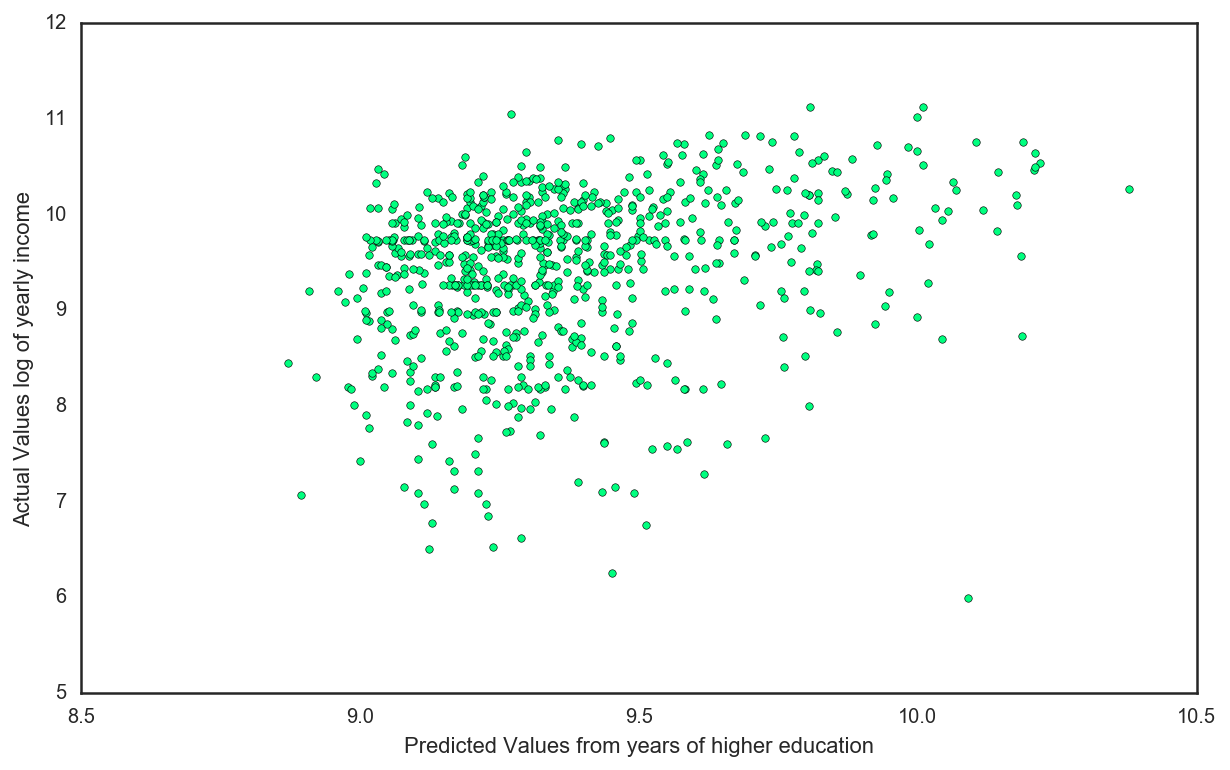

('MSE:', 0.64895763787501726)


In [47]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions1, y1test, s=14, c='springgreen', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE:", mean_squared_error(y1test, predictions1))

### Using stats model

In [48]:
lm_stats_1 = smf.ols(formula='log_year_salary ~  years_high_edu+ experience + experience_2', data=df).fit()
print (lm_stats_1.summary())

                            OLS Regression Results                            
Dep. Variable:        log_year_salary   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     84.10
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           4.89e-52
Time:                        16:12:50   Log-Likelihood:                -3295.9
No. Observations:                2726   AIC:                             6600.
Df Residuals:                    2722   BIC:                             6623.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          7.5466      0.170     44.

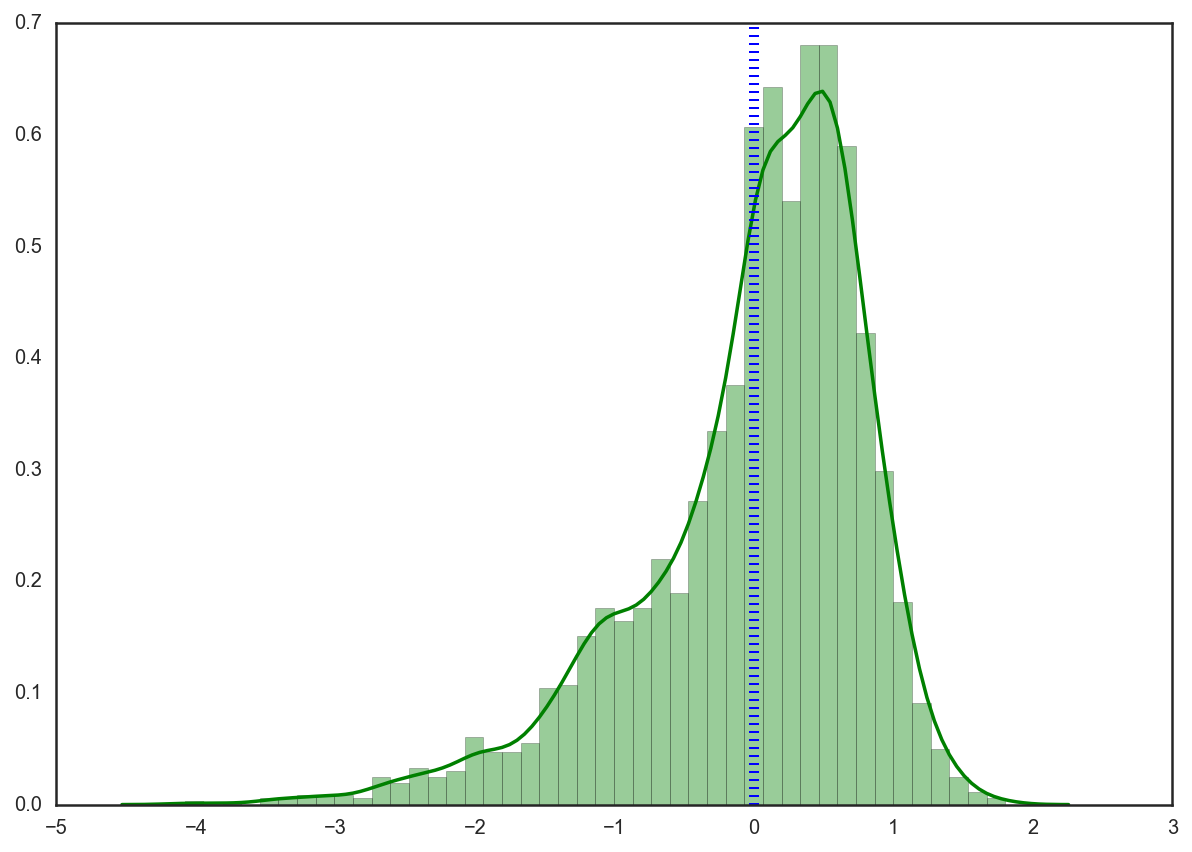

In [49]:
## make a graph of your residuals and include a line for the mean
np.mean(lm_stats_1.resid)
sns.distplot(lm_stats_1.resid, color='g')
plt.axvline(np.mean(lm_stats_1.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [50]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(lm_stats_1.resid)
print (lzip(name, test))
print ("\n========\n")

name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(lm_stats_1.resid)
print (lzip(name, test))
print ("\n========\n")

print ("Multicollinearity test:", np.linalg.cond(lm_stats_1.model.exog))
print ("\n========\n")

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(lm_stats_1.resid, lm_stats_1.model.exog)
print ("Heteroskedasticity test" , lzip(name, test))


[('Jarque-Bera', 955.75750401689), ('Chi^2 two-tail prob.', 2.8833342042177262e-208), ('Skew', -1.173531669985839), ('Kurtosis', 4.704666103230811)]


[('Chi^2', 518.14830106379691), ('Two-tail probability', 3.0586234947163904e-113)]


('Multicollinearity test:', 5235.4788847697728)


('Heteroskedasticity test', [('Lagrange multiplier statistic', 4.7666458202958992), ('p-value', 0.18970396016585631), ('f-value', 1.589329571572913), ('f p-value', 0.18986096117016715)])


## Correaltion matrix


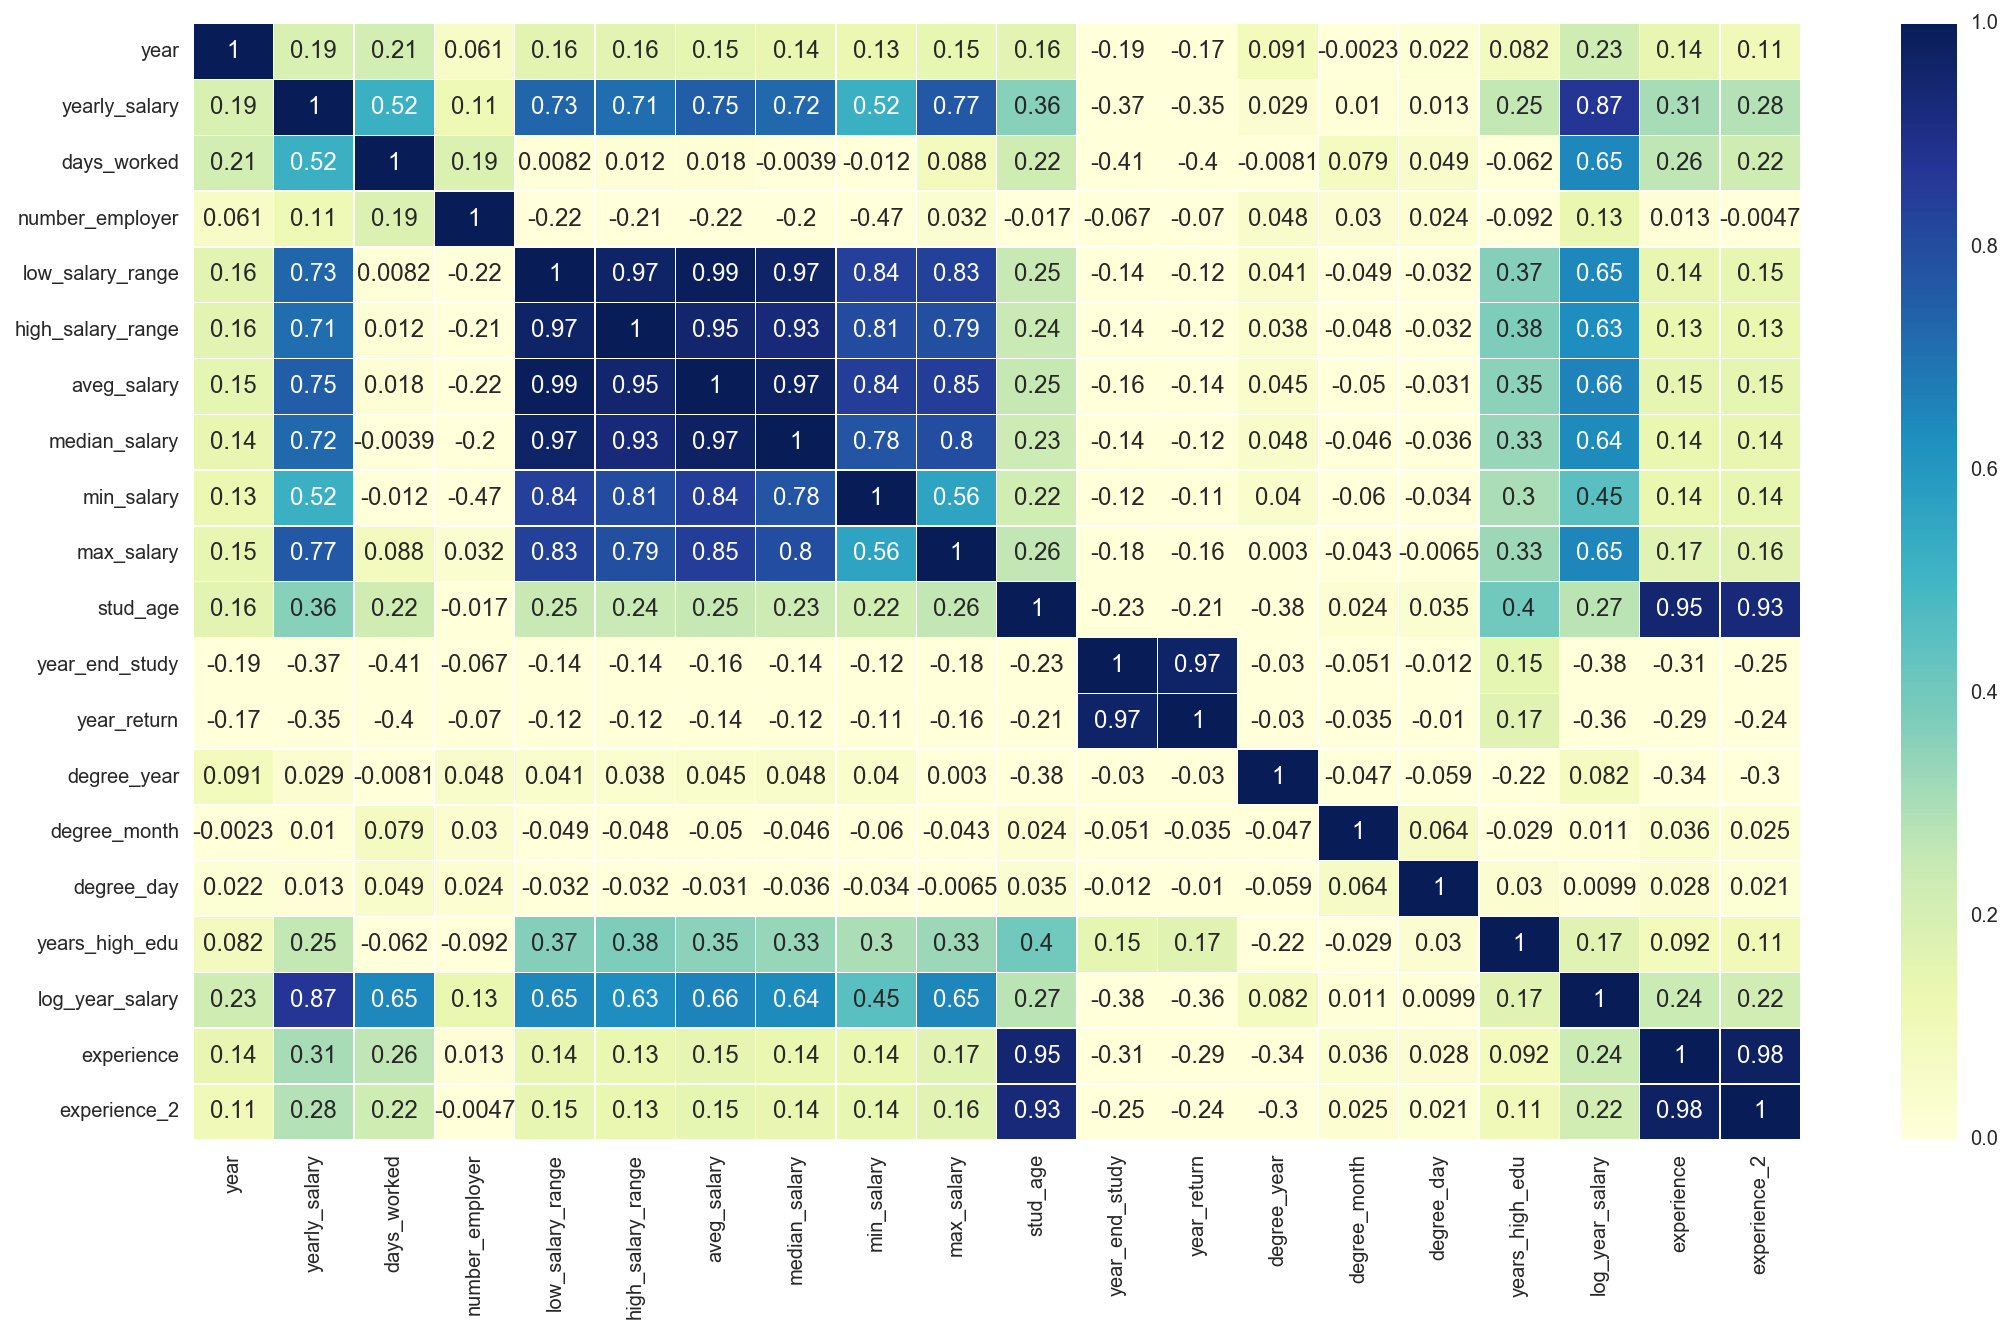

In [51]:
fig = plt.figure(figsize=(18,10))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

######################################################################################################################
### There are issues of multicollinearity, lets address this issue
X2 and y2 and X2 is standarized

In [52]:
formula1 = '''
log_year_salary ~ years_high_edu, experience, experience_2, C(gender), stud_age, 
C(ethnicity), C(prov_resid), C(country_study), C(marital_status) -1
'''
formula1 = formula1.replace(",", "+")

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

y2, X2 = patsy.dmatrices(formula1, data=df, return_type="dataframe")
y2 = np.ravel(y2)


# use the "fit_transform" function to normalize the X design matrix
X2n = ss.fit_transform(X2)

print (y2.shape)
print ("\n=====\n")
print (X2n.shape)

(2726,)

=====

(2726, 78)


* Normalization is necessary for regularized regression because the beta values for each predictor variable must be on the same scale. If betas are different sizes just because of the scale of predictor variables the regularization term can't determine which betas are more/less important based on their size.

In [54]:
X2train, X2test, y2train, y2test = train_test_split(X2n, y2, test_size=0.30)
print ("Shape of X2 train:", X2train.shape) 
print ("Shape of y2 train:", y2train.shape)
print ("\n=====\n")
print ("Shape of X2 test:", X2test.shape)
print ("Shape of y2 test:", y2test.shape)

('Shape of X2 train:', (1908, 78))
('Shape of y2 train:', (1908,))

=====

('Shape of X2 test:', (818, 78))
('Shape of y2 test:', (818,))


## Using Skelearn

In [55]:
from sklearn.cross_validation import cross_val_score

Cross-validate the $R^2$ of a linear regression model with 5 cross-validation folds

In [56]:
lm2 = linear_model.LinearRegression()
model2 = cross_val_score(lm2, X2train, y2train, cv=10)

In [57]:
## base line
print y2train.mean()

9.38142206934


In [58]:
print (model2)
print (np.mean(model2))

[ -1.33510186e+26  -1.35434191e+23  -8.92768351e+26   1.01251566e-01
   3.82128834e-02  -3.45059886e+24  -7.92338979e+23  -4.61685152e+24
  -2.92258336e+25  -3.57343554e+25]
-1.10023394963e+26


* The mean R^2 is extremely negative. All the R^2 scores are negative in crossvalidation.
* The linear regression is performing far worse than baseline on the test sets.
* It is probably dramatically overfitting and the redundant variables are affecting the coefficients.

### Using stats model

In [59]:
lm_stats_2 = smf.ols(formula1, data=df).fit()
print (lm_stats_2.summary())

                            OLS Regression Results                            
Dep. Variable:        log_year_salary   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     6.950
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           1.78e-61
Time:                        16:12:54   Log-Likelihood:                -3168.9
No. Observations:                2726   AIC:                             6492.
Df Residuals:                    2649   BIC:                             6947.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------

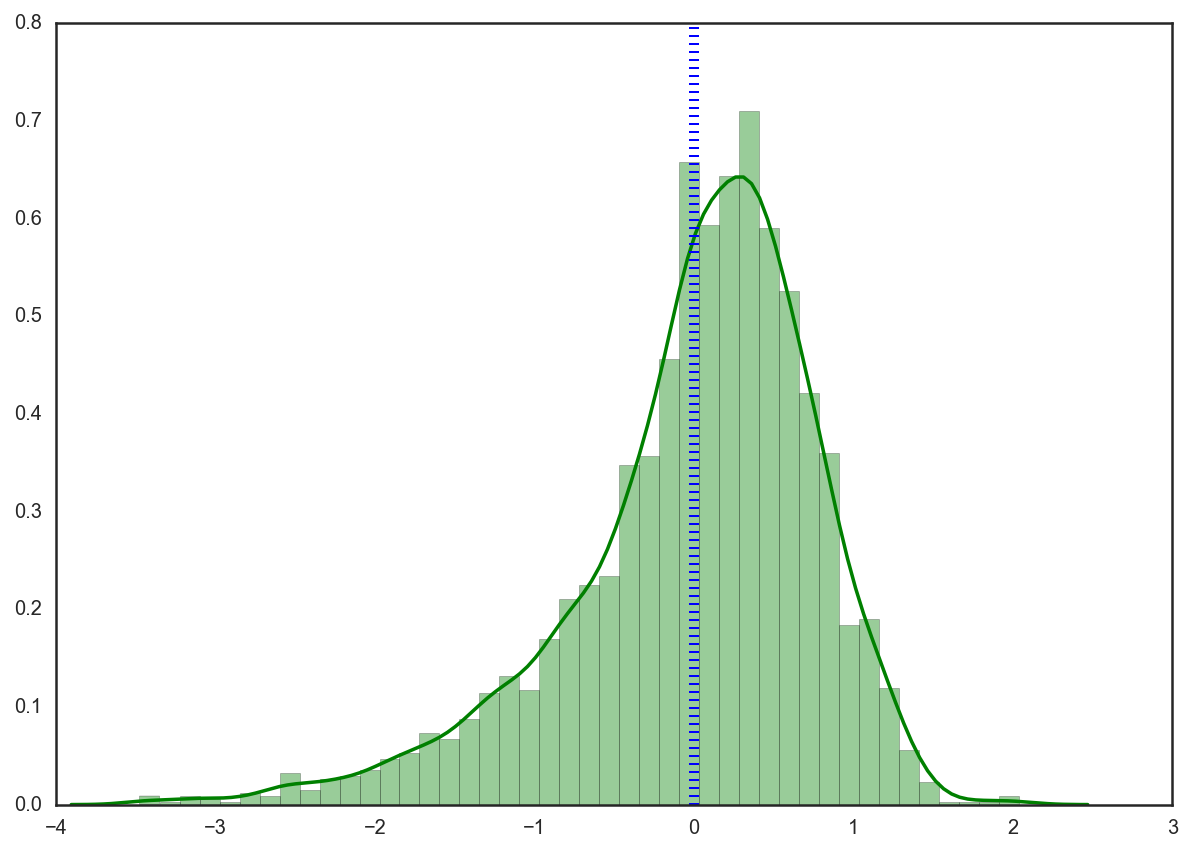

In [60]:
## make a graph of your residuals and include a line for the mean
np.mean(lm_stats_2.resid)
sns.distplot(lm_stats_2.resid, color='g')
plt.axvline(np.mean(lm_stats_2.resid), color='b', linestyle='dotted', linewidth=5)
plt.show()

In [61]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(lm_stats_2.resid)
print (lzip(name, test))
print ("\n========\n")

name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(lm_stats_2.resid)
print (lzip(name, test))
print ("\n========\n")

print ("Multicollinearity test:", np.linalg.cond(lm_stats_2.model.exog))
print ("\n========\n")

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breushpagan(lm_stats_2.resid, lm_stats_2.model.exog)
print ("Heteroskedasticity test" , lzip(name, test))

[('Jarque-Bera', 778.8517891649356), ('Chi^2 two-tail prob.', 7.4900181931635951e-170), ('Skew', -1.042198032589426), ('Kurtosis', 4.585051660395414)]


[('Chi^2', 444.29310757428755), ('Two-tail probability', 3.334091516055534e-97)]


('Multicollinearity test:', 1.7146833885741693e+17)


('Heteroskedasticity test', [('Lagrange multiplier statistic', 169.49133391597886), ('p-value', 6.6012949519543701e-09), ('f-value', 2.3108331784664866), ('f p-value', 1.8870473457352731e-09)])


## We are going to address the issue of multicollinearity using Ridge, Lasso and ElasticNet

## Ridge
Let's find an optimal value for **Ridge** regression alpha using RidgeCV


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

* Hint: once the RidgeCV is fit, the attribute .alpha_ contains the best alpha parameter it found through cross-validation.
* Ridge performs best searching alphas through logarithmic space (np.logspace).

In [62]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [63]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X2train, y2train)

print (optimal_ridge.alpha_)

821.434358492


Cross-validate the Ridge $R^2$ with the optimal alpha.

In [64]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X2train, y2train, cv=10)

print (ridge_scores)
print (np.mean(ridge_scores))

[ 0.0506686   0.16873056  0.12518106  0.08784334  0.05568538  0.0600352
  0.15315871  0.08627918  0.14303996  0.127982  ]
0.105860399596


* It's vastly better than the Linear Regression. 
* There is likely so much multicollinearity in the data that vanilla regression can't do anything properly. Ridge is able to manage the multicollinearity and get a good result.

### Find an optimal value for Lasso regression alpha using LassoCV

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

* Hint: again, once the LassoCV is fit, the attribute .alpha_ contains the best alpha parameter it found through cross-validation.
* Lasso, unlike Ridge, performs best searching alphas through linear space (np.linspace). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument n_alphas= to however many alphas you want it to search over.

In [65]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X2train, y2train)

print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0042158196794


..........................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


Cross-validate the Lasso $R^2$ with the optimal alpha

In [66]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X2train, y2train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.04142566  0.18439454  0.10692433  0.0851568   0.03937662  0.03995398
  0.16134064  0.09078598  0.1541439   0.12969258]
0.103319502421


* The lasso performs slightly better than the Ridge, but similarly.
* Lasso deals primarily with the feature selection of valuable variables, eliminating ones that are not useful. This also takes care of multicollinearity, but in a different way: it will choose the "best" of the correlated variablesand zero-out the other redundant ones.

* There may also be useless variables in the data which it is simply getting rid of entirely.

#### Look at the coefficients for variables in the Lasso.

In [67]:
lasso.fit(X2train, y2train)

Lasso(alpha=0.0042158196794048561, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_coefs = pd.DataFrame({'variable':X2.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

abs_coef      coef                                       variable
77  0.323189  0.323189                                       stud_age
76  0.133609 -0.133609                                   experience_2
71  0.106763 -0.106763                   C(marital_status)[T.SOLTERO]
41  0.079399  0.079399                       C(country_study)[T.CUBA]
24  0.066975  0.066975                     C(prov_resid)[T.PICHINCHA]
31  0.064972 -0.064972                  C(country_study)[T.AUSTRALIA]
45  0.060849  0.060849               C(country_study)[T.u'ESPA\xd1A']
65  0.058456 -0.058456                     C(country_study)[T.SUECIA]
0   0.044682  0.044682                              C(gender)[HOMBRE]
48  0.041704 -0.041704               C(country_study)[T.u'Espa\xf1a']
62  0.040710  0.040710                C(country_study)[T.REINO UNIDO]
35  0.038239 -0.038239                     C(country_study)[T.BRASIL]
22  0.036699 -0.036699                      C(prov_resid)[T.ORELLANA]
33  0.033562 -0.033562                    C(country_study)[T.BELGICA]
19  0.030359  0.030359                        C(prov_resid)[T.MANABI]
55  0.028323  0.028323                     C(country_study)[T.ITALIA]
43  0.026804 -0.026804                    C(country_study)[T.ECUADOR]
6   0.026551 -0.026551                       C(prov_resid)[T.BOLIVAR]
46  0.026384 -0.026384  C(country_study)[T.ESTADOS UNIDOS DE AMERICA]
32  0.025991 -0.025991                    C(country_study)[T.AUSTRIA]

In [69]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X2train.shape[0]))

('Percent variables zeroed out:', 0.009433962264150943)


## Find an optimal value for Elastic Net regression alpha using ElasticNetCV

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html


Note here that you will be optimizing both the alpha parameter and the l1_ratio:
*  alpha: strength of regularization
*  l1_ratio: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)

* Do not include 0 in the search for l1_ratio: it will not allow it and break!
* You can use n_alphas for the alpha parameters instead of setting your own values: highly recommended!
* Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [70]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10, verbose=1)
optimal_enet.fit(X2train, y2train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.345350924907
0.01


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   34.8s finished


Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.
* This is another way to look at the performance of your model.
* The tighter the distribution of residuals around zero, the better your model has performed!


In [71]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X2train, y2train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.05116014  0.16918225  0.12179132  0.08730277  0.05382029  0.05709034
  0.15522874  0.08441181  0.14572066  0.12808249]
0.105379081536


## Plot the residuals for the ridge, lasso, and elastic net on histograms

In [72]:
## Fit
ridge.fit(X2train, y2train)
enet.fit(X2train, y2train)
lasso.fit(X2train, y2train)

Lasso(alpha=0.0042158196794048561, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
# residuals:
ridge_resid = y2test - ridge.predict(X2test)
lasso_resid = y2test - lasso.predict(X2test)
enet_resid = y2test - enet.predict(X2test)

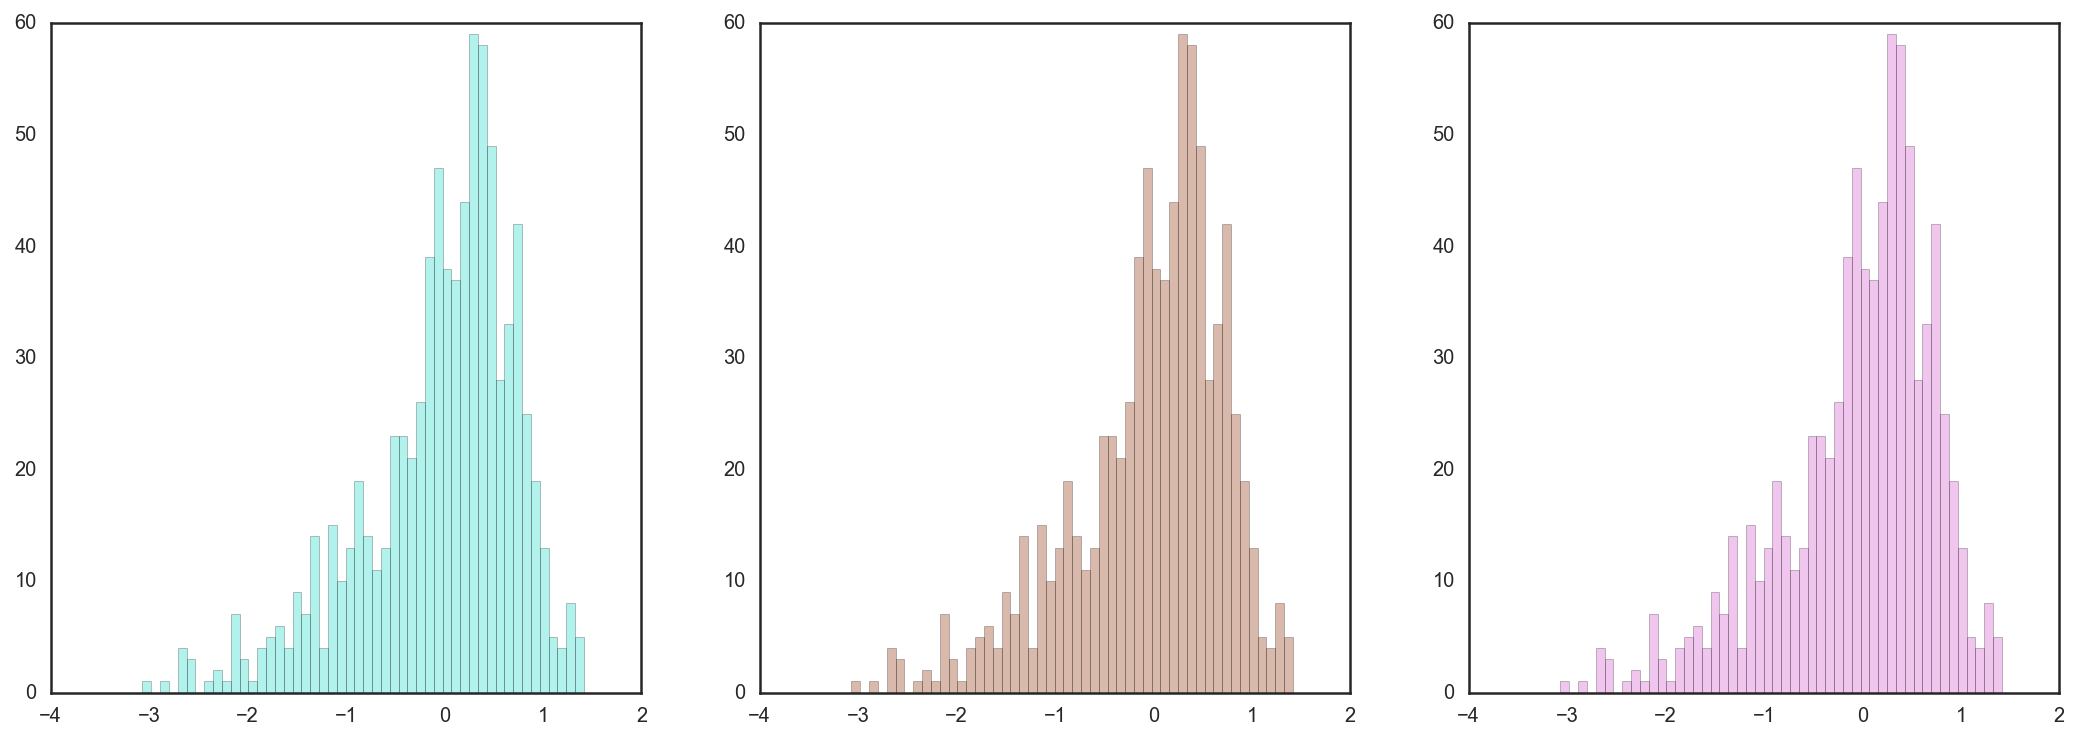

In [74]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='turquoise', ax=axarr[0], label='Ridge residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='sienna', ax=axarr[1], label='Lasso residuals')

sns.distplot(ridge_resid, bins=50, hist=True, kde=False, 
             color='orchid', ax=axarr[2], label='ElasticNet residuals')

plt.show()